<a href="https://colab.research.google.com/github/Titiksha20/Statitical-Mechanics-Framework-on-Graphs-/blob/main/For_10_cross_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas===1.2.5
import pandas as pd
import numpy as np
pd.__version__


'1.2.5'

In [ ]:
oned = [x+1 for x in range(10)]
print(oned)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
x1 = pd.DataFrame(data=oned,columns=['x1'])
y1 = pd.DataFrame(data=oned,columns=['y1'])

In [ ]:
particleA = x1.merge(y1, how= "cross")   #generating positions for particle A
particleA

,x1,y1
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
95,10,6
96,10,7
97,10,8
98,10,9


In [ ]:
particleB = particleA.copy()      # generating positions for particle B
particleB

,x1,y1
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
...,...,...
95,10,6
96,10,7
97,10,8
98,10,9


In [ ]:
# obtaining all possible configurations of positions by crossing the tables
config = particleA.merge(particleB,how="cross")
config

,x1_x,y1_x,x1_y,y1_y
0,1,1,1,1
1,1,1,1,2
2,1,1,1,3
3,1,1,1,4
4,1,1,1,5
...,...,...,...,...
9995,10,10,10,6
9996,10,10,10,7
9997,10,10,10,8
9998,10,10,10,9


In [ ]:
# generating only valid configurations such that no two particles are at same postion
config.columns = ['x1','y1','x2','y2']
valid = config[(config['x1'] != config['x2']) | ((config['x1'] == config['x2']) & (config['y1']!=config['y2']))]
valid.tail()

,x1,y1,x2,y2
9994,10,10,10,5
9995,10,10,10,6
9996,10,10,10,7
9997,10,10,10,8
9998,10,10,10,9


In [ ]:
x1 = np.array(valid.x1.tolist())
y1 = np.array(valid.y1.tolist())
x2 = np.array(valid.x2.tolist())
y2 = np.array(valid.y2.tolist())

In [ ]:
import math


In [ ]:
deltax = valid['x1']- valid['x2']
deltay = valid['y1']- valid['y2']
xsq = deltax.mul(other= deltax)
ysq = deltay.mul(other= deltay)
sumsq = xsq + ysq
sumsqrt = sumsq.apply(math.sqrt)   # finding  the distance 

In [ ]:
r = np.array(sumsqrt.tolist())

In [ ]:
def calcU(r):
    U = 1/(r**12)-1/(r**6)  # calculating potential over the distance
    return U

In [ ]:
Poten = sumsqrt.apply(calcU)
print(Poten)

1       0.000000
2      -0.015381
3      -0.001370
4      -0.000244
5      -0.000064
          ...   
9994   -0.000064
9995   -0.000244
9996   -0.001370
9997   -0.015381
9998    0.000000
Length: 9900, dtype: float64


In [ ]:
from math import e
import scipy.constants as sc

In [ ]:
def probab_calc(Ua, Ub):                            ## calculating probability
  if (Ua - Ub < 0 ):
    probab = 1                                       
  else:
    probab = math.e**(Ub - Ua)  ### check units
  return probab

In [ ]:
Poten = np.array(Poten.tolist())
Poten

array([ 0.        , -0.01538086, -0.00136986, ..., -0.00136986,
       -0.01538086,  0.        ])

In [ ]:
l = len(Poten)
T = np.matrix(np.zeros((l,l)))     # initializing probability matrix
for i in range(l):
  for j in range(l):
    T[i,j] = probab_calc(Poten[j], Poten[i])

In [ ]:

import random
import bisect

In [ ]:
def selection(a, i, N):               # defining function to generate a new state at every time step

    use_arr = a[i-1][:N]
    #tot = np.sum(use_arr)
    #use_arr = use_arr/tot
    use_arr = np.array(use_arr.T)
    new_arr = np.cumsum(use_arr)
    new_arr = np.insert(new_arr, 0, 0)
    l = new_arr[9900]
    k = random.uniform(0,l)
    f = bisect.bisect_right(new_arr, k , 0, N+1)
    acep = use_arr[f-1]

    return f, acep

In [ ]:
num_steps = 1000000               
N = 9900 # Number of states
os = random.randint(1, N)
acc = 0
N_S = []
for i in range(num_steps):             # simulation
    ns, acep = selection(T, os, N) 
    if (random.uniform(0,1) <= acep):
        N_S.append(ns)
        print(ns, i)
        os = ns
        acc = acc + 1
print(acc)

Streaming output truncated to the last 5000 lines.
971 994981
6985 994982
5961 994983
7449 994984
8451 994985
7151 994986
9613 994987
7014 994988
850 994989
5685 994990
7826 994991
5506 994992
380 994993
6449 994994
9236 994995
399 994996
4366 994997
4770 994998
5103 994999
4921 995000
1964 995001
6713 995002
6097 995003
6058 995004
5648 995005
1572 995006
5865 995007
5467 995008
2536 995009
7382 995010
9122 995011
4835 995012
3861 995013
3240 995014
9333 995015
6506 995016
1091 995017
8068 995018
4798 995019
7641 995020
6697 995021
4300 995022
198 995023
688 995024
5869 995025
8404 995026
9425 995027
4995 995028
518 995029
5606 995030
1580 995031
1886 995032
4328 995033
8467 995034
5011 995035
8104 995036
3302 995037
9891 995038
2770 995039
9578 995040
4992 995041
5668 995042
6076 995043
9433 995044
6211 995045
3303 995046
4756 995047
955 995048
4861 995049
1596 995050
2376 995051
3818 995052
1511 995053
2209 995054
8417 995055
5945 995056
6710 995057
4619 995058
9519 995059
603 99506

In [ ]:
k =len(N_S)

In [ ]:
R_N= []
for i in range(k):
  temp = N_S[i]
  temp1 =  r[temp-1]
  R_N.append(temp1)

In [ ]:
R_N

[1.0,
 3.0,
 3.605551275463989,
 4.123105625617661,
 2.0,
 3.1622776601683795,
 2.0,
 5.0990195135927845,
 7.211102550927978,
 4.242640687119285,
 8.0,
 7.615773105863909,
 7.211102550927978,
 2.0,
 1.4142135623730951,
 3.1622776601683795,
 1.0,
 1.0,
 3.1622776601683795,
 4.123105625617661,
 6.082762530298219,
 7.615773105863909,
 7.0,
 4.47213595499958,
 2.0,
 4.123105625617661,
 6.4031242374328485,
 5.0,
 5.0990195135927845,
 7.0710678118654755,
 5.0990195135927845,
 5.385164807134504,
 9.219544457292887,
 4.0,
 1.0,
 4.123105625617661,
 4.47213595499958,
 8.602325267042627,
 4.0,
 4.123105625617661,
 2.23606797749979,
 4.123105625617661,
 3.1622776601683795,
 4.242640687119285,
 8.06225774829855,
 5.0,
 4.123105625617661,
 5.0,
 5.385164807134504,
 9.433981132056603,
 2.23606797749979,
 8.246211251235321,
 4.0,
 2.23606797749979,
 7.211102550927978,
 7.0,
 1.4142135623730951,
 6.324555320336759,
 9.899494936611665,
 1.4142135623730951,
 7.211102550927978,
 7.810249675906654,
 3.0,


In [ ]:
Ns = len(R_N)          # calculating RDF
Ns
count, edge = np.histogram(R_N, bins=20)
count
vol = np.pi*np.power(edge[1:], 2) - np.power(edge[:-1], 2)
rdf = []
for i in range(20):
  temp = count[i]/(vol[i]*ns)
  rdf.append(temp)


In [ ]:
from matplotlib import pyplot as plt
plt.plot(rdf)
plt.savefig('rdf10*10LJ.png')
plt.close()

In [ ]:
x_1 = []
y_1 =[]
x_2 = []
y_2 = []
k = len(N_S)

for i in range(k):
  temp = N_S[i]
  temp1 = x1[temp-1]
  x_1.append(temp1)
  temp2 = y1[temp-1]
  y_1.append(temp2)
  temp3 = x2[temp-1]
  x_2.append(temp3)
  temp4 = y2[temp-1]
  y_2.append(temp4)

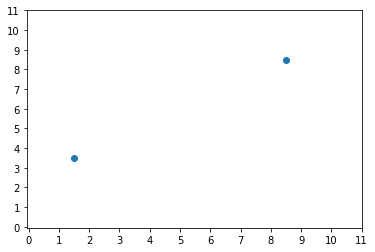

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation
import numpy as np

matplotlib.rcParams['animation.embed_limit'] = 2**128

fig, ax = plt.subplots()
l, = ax.plot([],[],'o')

ax.set_xticks(np.arange(0, 12, 1))
ax.set_yticks(np.arange(0, 12, 1))


animate = lambda i: l.set_data([x_1[i]-0.5,y_1[i]-0.5],[x_2[i]-0.5,y_2[i]-0.5])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=100,interval=200)

from IPython.display import HTML
HTML(ani.to_jshtml())